# **Import Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


# **Read Data**

In [2]:
df=pd.read_csv("/content/powerdemand_5min_2021_to_2024_with weather.csv")
df

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000


# **Exploratry Data Analysis**

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.shape

(393440, 14)

In [4]:
df.info() #non-null count ,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      393440 non-null  object 
 1   Power demand  393440 non-null  float64
 2   temp          393440 non-null  float64
 3   dwpt          393440 non-null  float64
 4   rhum          393440 non-null  float64
 5   wdir          392900 non-null  float64
 6   wspd          393440 non-null  float64
 7   pres          393440 non-null  float64
 8   year          393440 non-null  int64  
 9   month         393440 non-null  int64  
 10  day           393440 non-null  int64  
 11  hour          393440 non-null  int64  
 12  minute        393440 non-null  int64  
 13  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 42.0+ MB


In [5]:
df.describe() #Statistical Summary

,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
count,393440.000000,393440.000000,393440.000000,393440.000000,392900.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393438.000000
mean,3960.736469,25.527913,16.338046,63.435767,163.777081,7.854550,1008.932695,2022.487129,6.446991,15.745171,11.184371,27.354959,3960.746273
std,1300.473773,7.981563,7.377440,24.850663,116.888397,5.664314,6.902759,1.110587,3.412654,8.783091,6.797501,17.223877,1299.545642
min,1302.080000,4.000000,-8.600000,5.000000,0.000000,0.000000,989.600000,2021.000000,1.000000,1.000000,0.000000,0.000000,1307.680000
25%,3074.900000,20.000000,10.400000,44.000000,50.000000,5.400000,1003.000000,2021.000000,3.000000,8.000000,5.000000,10.000000,3075.861667
50%,3832.320000,27.000000,15.400000,67.000000,160.000000,7.600000,1009.000000,2022.000000,6.000000,16.000000,11.000000,25.000000,3831.728333
75%,4870.465000,31.000000,23.900000,84.000000,270.000000,11.200000,1015.000000,2023.000000,9.000000,23.000000,17.000000,40.000000,4869.906667
max,8631.530000,46.400000,30.300000,100.000000,360.000000,63.000000,1027.000000,2024.000000,12.000000,31.000000,23.000000,55.000000,8598.126667


Feature Engineering

In [6]:
# Convert 'datetime' column to datetime objects if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# **DATA CLEANING**

Missing Values

In [7]:
# Check for missing values
df.isnull().sum()

# Drop rows with any missing values
df_clean = df.dropna()
df_clean

,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55,1952.006667
6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0,1929.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000


Duplicate Values

In [8]:
# Check duplicates
df_clean.duplicated().sum()

np.int64(0)

In [9]:
# Drop duplicates
df_clean = df_clean.drop_duplicates()
df_clean

,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55,1952.006667
6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0,1929.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000


Outliers Detection

In [10]:
# Calculate IQR
Q1 = df['Power demand'].quantile(0.25)
Q3 = df['Power demand'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = (df['Power demand'] < lower_bound) | (df['Power demand'] > upper_bound)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 1213


In [11]:
df_clean = df[~outliers].copy()
print(f"Data shape after outlier removal: {df_clean.shape}")

Data shape after outlier removal: (392227, 14)


Logic of sin-cos encoding:

🌀 Cyclic nature: Time features like hours (0–23), days (0–6), and months (1–12) are cyclical, meaning the end connects back to the start (e.g., hour 23 → hour 0).

📈 Problem with linear encoding: A model sees 0 and 23 as far apart numerically, though they are next to each other in time.

🔄 Circle mapping: sin and cos map each value onto a circle (e.g., clock face), capturing true proximity and cycles.

Why use sin and cos together:

🧭 Full position: sin captures the vertical axis; cos captures the horizontal. Both are needed to pinpoint a unique position on the circle.

⚠️ One alone is incomplete: Using only sin (or cos) loses information about direction/position in the cycle.

In short:
➡️ We drop the originals to avoid redundancy. Sin-cos encoding lets the model "see" cycles properly, and both are needed together to fully describe the cycle's position.



In [12]:
df_clean['day_of_week'] = df_clean['datetime'].dt.dayofweek
df_clean['hour'] = df_clean['datetime'].dt.hour
df_clean['month'] = df_clean['datetime'].dt.month

df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)
df_clean['day_sin'] = np.sin(2 * np.pi * df_clean['day_of_week'] / 7)
df_clean['day_cos'] = np.cos(2 * np.pi * df_clean['day_of_week'] / 7)
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)

df_clean=df_clean.drop(columns=['day_of_week','hour','month','datetime'])
df_clean

,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,day,minute,moving_avg_3,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,30,NaN,0.0,1.0,-0.433884,-0.900969,5.000000e-01,0.866025
1,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,35,NaN,0.0,1.0,-0.433884,-0.900969,5.000000e-01,0.866025
2,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,40,1999.076667,0.0,1.0,-0.433884,-0.900969,5.000000e-01,0.866025
3,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,45,1986.556667,0.0,1.0,-0.433884,-0.900969,5.000000e-01,0.866025
4,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,50,1969.470000,0.0,1.0,-0.433884,-0.900969,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,10,2174.893333,0.0,1.0,0.433884,-0.900969,-2.449294e-16,1.000000
393436,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,15,2139.416667,0.0,1.0,0.433884,-0.900969,-2.449294e-16,1.000000
393437,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,20,2115.423333,0.0,1.0,0.433884,-0.900969,-2.449294e-16,1.000000
393438,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,25,2086.200000,0.0,1.0,0.433884,-0.900969,-2.449294e-16,1.000000


# **Data Visualisation**

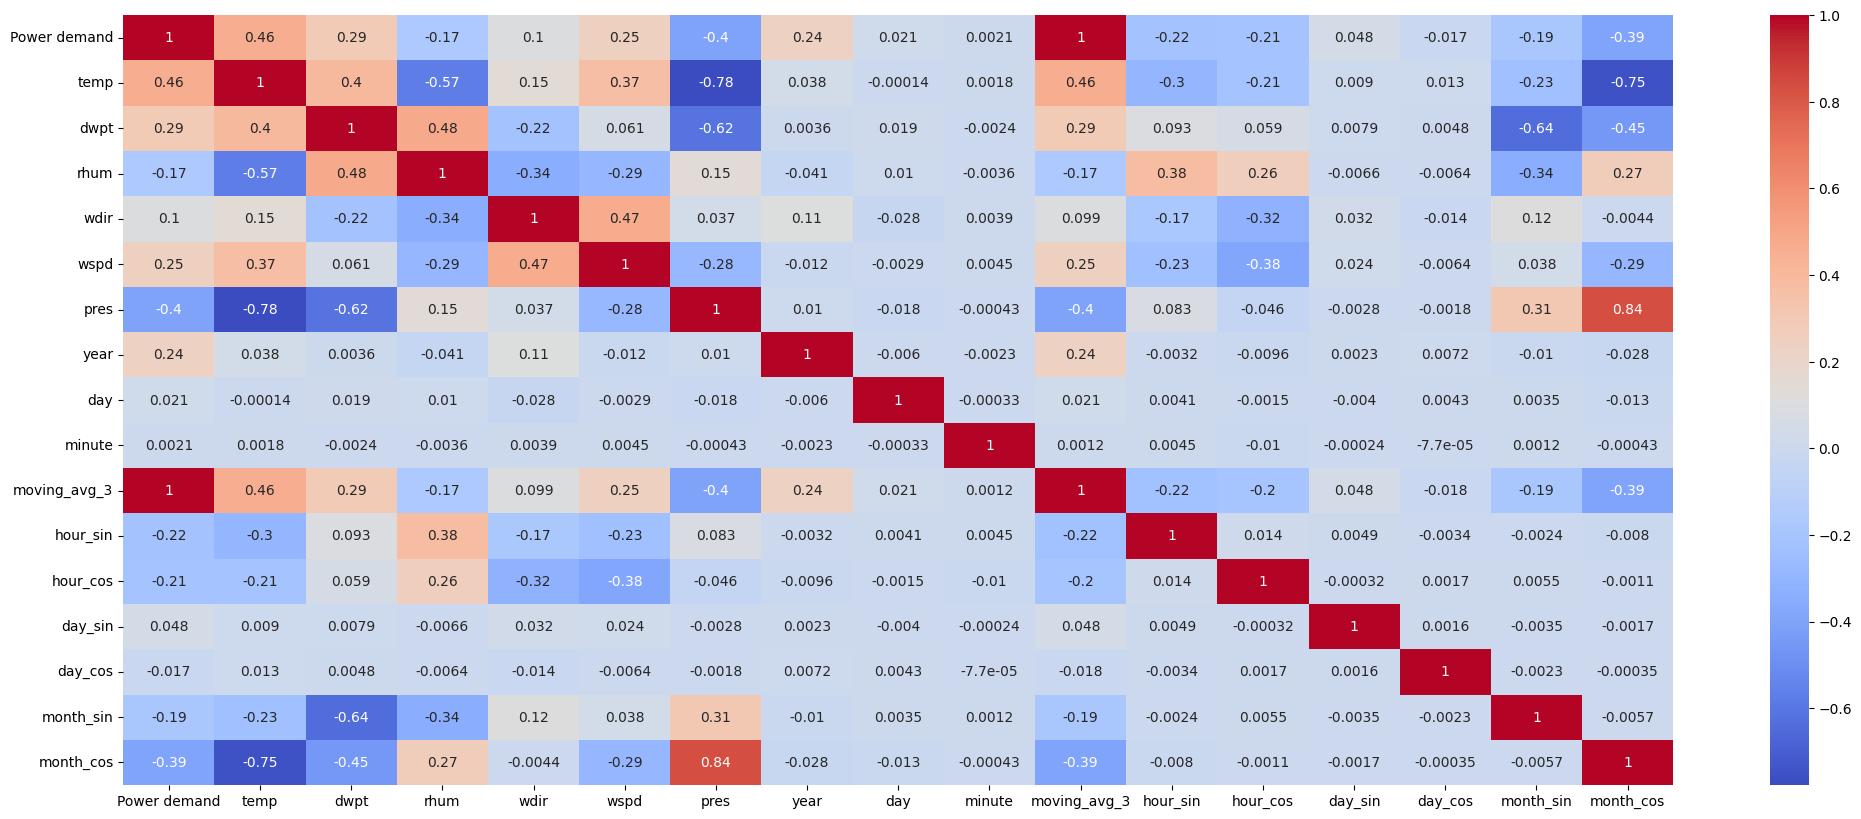

In [13]:
corr = df_clean.corr()
plt.figure(figsize=(25, 10))

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [14]:
corr_matrix = df_clean.corr()
print(corr_matrix['Power demand'].sort_values(ascending=False))


Power demand    1.000000
moving_avg_3    0.999103
temp            0.463890
dwpt            0.290279
wspd            0.249548
year            0.239870
wdir            0.099804
day_sin         0.047708
day             0.021119
minute          0.002074
day_cos        -0.017433
rhum           -0.167670
month_sin      -0.185231
hour_cos       -0.209453
hour_sin       -0.220293
month_cos      -0.388759
pres           -0.398078
Name: Power demand, dtype: float64


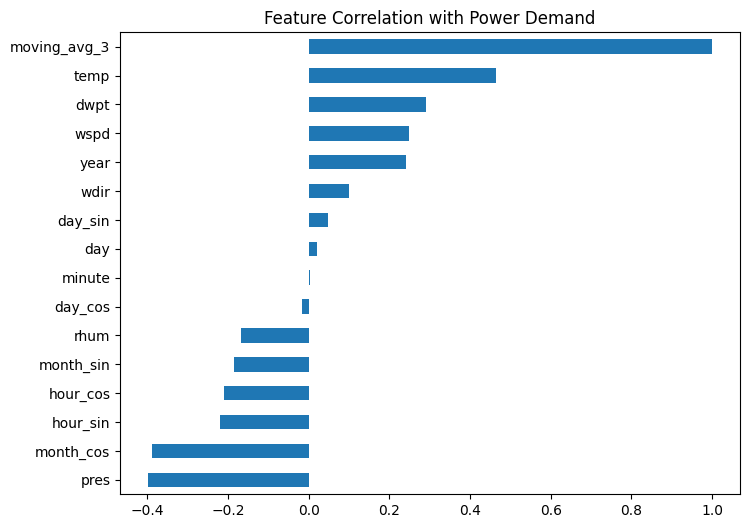

In [15]:
corr_target = df_clean.corr()['Power demand'].sort_values()
corr_target.drop('Power demand').plot(kind='barh', figsize=(8, 6))
plt.title('Feature Correlation with Power Demand')
plt.show()


moving_avg_3 – 🔥 Very strong correlation (0.999) with power demand; key predictor.

temp – 🌡️ Moderate correlation (0.46); temperature affects demand (e.g., heating/cooling).

dwpt (Dew Point) – 🌫️ Moderate (0.29); linked to weather conditions.

wspd (Wind Speed) – 💨 Moderate (0.25); can indirectly affect power use.

year – 📅 Mild (0.24); captures long-term trends (growth, changes over years).

month_cos, hour_sin, hour_cos – 🌀 Moderate negative correlation (~ -0.2 to -0.38); capture cyclical seasonal/time patterns.

🚫 Drop (Weak correlation):
minute, day_sin, day_cos, wdir – Near-zero correlation → likely add noise, no strong relationship to target.



Features Selection

In [16]:
features_to_keep = [
    'temp',
    'dwpt',
    'wspd',
    'year',
    'month_cos',
    'hour_sin',
    'hour_cos',
    'Power demand'  # Keep the target too!
]
# 🔄 Create a new DataFrame with only selected features
df_selected = df_clean[features_to_keep].copy()

# 🚀 Check the new DataFrame
df_selected.head()

,temp,dwpt,wspd,year,month_cos,hour_sin,hour_cos,Power demand
0,8.0,6.9,0.0,2021,0.866025,0.0,1.0,2014.00
1,8.0,6.9,0.0,2021,0.866025,0.0,1.0,2005.63
2,8.0,6.9,0.0,2021,0.866025,0.0,1.0,1977.60
3,8.0,6.9,0.0,2021,0.866025,0.0,1.0,1976.44
4,8.0,6.9,0.0,2021,0.866025,0.0,1.0,1954.37


In [17]:
# Winsorize the 'Power demand' column to handle outliers.
#This method limits extreme values to a certain percentile, preserving most of the data while mitigating the influence of outliers.
from scipy.stats.mstats import winsorize

# ✅ Now apply winsorize safely
df_selected['Power demand'] = winsorize(df_selected['Power demand'], limits=[0.05, 0.05])
df_selected

,temp,dwpt,wspd,year,month_cos,hour_sin,hour_cos,Power demand
0,8.0,6.9,0.0,2021,0.866025,0.0,1.0,2014.00
1,8.0,6.9,0.0,2021,0.866025,0.0,1.0,2005.63
2,8.0,6.9,0.0,2021,0.866025,0.0,1.0,1977.60
3,8.0,6.9,0.0,2021,0.866025,0.0,1.0,1976.44
4,8.0,6.9,0.0,2021,0.866025,0.0,1.0,1954.37
...,...,...,...,...,...,...,...,...
393435,12.3,6.8,1.8,2024,1.000000,0.0,1.0,2146.84
393436,12.3,6.8,1.8,2024,1.000000,0.0,1.0,2116.66
393437,12.3,6.8,1.8,2024,1.000000,0.0,1.0,2082.77
393438,12.3,6.8,1.8,2024,1.000000,0.0,1.0,2059.17


Winsorization is a data transformation technique that limits extreme values (outliers) in your data by capping them to a certain percentile.

➡️ Instead of removing outliers, it pushes them toward the nearest acceptable value.

🔍 Example:
If you winsorize at 5%:

Any data below the 5th percentile is set to the 5th percentile.

Any data above the 95th percentile is set to the 95th percentile.

This reduces the impact of outliers while keeping all data points in your dataset.

Data Splitting

In [18]:
X=df_selected.drop(columns=['Power demand'])
Y=df_selected['Power demand']

In [19]:
# Assuming X = your features, Y = your target
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Check sizes
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")



Train size: 274558
Validation size: 58834
Test size: 58835


In [20]:
mask = ~X_train.isnull().any(axis=1)

# Keep only non-NaN rows
X_train = X_train[mask]
y_train = y_train[mask]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

# **Model Building**

Multiple Regression

In [21]:
RegressionModel = LinearRegression()
RegressionModel.fit(X_train, y_train)

LinearRegression()

In [22]:
y_val_pred = RegressionModel.predict(X_val)
results = pd.DataFrame({
    'Actual': y_val.reset_index(drop=True),
    'Predicted': y_val_pred
})
print(results.head(10))

    Actual    Predicted
0  4240.47  3927.774575
1  4128.34  4252.478719
2  3199.25  5034.385664
3  2975.62  4042.125167
4  1817.77  2406.469931
5  5299.47  4130.506785
6  2287.85  3747.754518
7  4971.94  4989.708780
8  3037.64  4327.014085
9  2470.72  2740.631616


In [23]:
# 2️⃣ Predictions for set
y_val_pred = RegressionModel.predict(X_val)
y_test_pred = RegressionModel.predict(X_test)

# 3️⃣ Evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

# 4️⃣ Evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# 🔥 Print results for both validation and test set
print(f"📊 Evaluation Metrics (Validation Set):")
print(f"MAE : {mae_val:.2f}")
print(f"MSE : {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R²  : {r2_val:}")
print(f"MAPE: {mape_val:.2f}%\n")

print(f"📊 Evaluation Metrics (Test Set):")
print(f"MAE : {mae_test:.2f}")
print(f"MSE : {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²  : {r2_test:}")
print(f"MAPE: {mape_test:.2f}%")


📊 Evaluation Metrics (Validation Set):
MAE : 806.93
MSE : 1006761.25
RMSE: 1003.37
R²  : 0.32335720784597954
MAPE: 23.38%

📊 Evaluation Metrics (Test Set):
MAE : 814.25
MSE : 1022104.70
RMSE: 1010.99
R²  : 0.32038430696727394
MAPE: 23.59%


Random Forest Regressor

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# Make predictions on the test set
y_val_pred = rf_model.predict(X_val)
y_pred = rf_model.predict(X_test)

In [26]:
results = pd.DataFrame({
    'Actual': y_val.reset_index(drop=True),
    'Predicted': y_val_pred
})
print(results.head(10))

    Actual    Predicted
0  4240.47  4223.396620
1  4128.34  4041.263186
2  3199.25  3292.426390
3  2975.62  2960.085104
4  1817.77  1817.770000
5  5299.47  5276.948177
6  2287.85  2326.204016
7  4971.94  4953.515299
8  3037.64  3065.061936
9  2470.72  2265.971238


In [27]:
#calculate evaluation metrics for validation set
mae_test = mean_absolute_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_val, y_val_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_val, y_val_pred)
mape_test = np.mean(np.abs((y_val - y_val_pred) / y_test)) * 100

# 2️⃣ Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 🔥 Print results for Random Forest Regressor
print(f"📊 Evaluation Metrics (Test Set) - Random Forest Regressor:")
print(f"MAE : {mae_test:.2f}")
print(f"MSE : {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²  : {r2_test:}")
print(f"MAPE: {mape_test:.2f}%")


📊 Evaluation Metrics (Test Set) - Random Forest Regressor:
MAE : 84.68
MSE : 55495.83
RMSE: 235.58
R²  : 0.9630998297147426
MAPE: 2.43%


Why is it not fruitful to rely solely on moving_avg_3 to predict Power Demand?
1. Loss of Predictive Power:
If Power Demand is highly correlated with moving_avg_3, it means that moving_avg_3 is already explaining most of the variance in the target variable.

In this case, adding moving_avg_3 as a feature won't provide much additional predictive value, because the model already has access to the same information through this feature.

2. Multicollinearity:
If Power Demand and moving_avg_3 are highly correlated, it could lead to multicollinearity issues in your regression model, as discussed earlier.

Multicollinearity makes it hard to interpret the individual effect of each variable, which could lead to unstable coefficient estimates and overfitting.

3. Overfitting:
Using moving_avg_3 as a predictor might result in overfitting because the model might memorize the relationship between moving_avg_3 and Power Demand, but it won't generalize well to new, unseen data.

4. Redundant Information:
Since moving_avg_3 is essentially a smoothing of past data points, if Power Demand is closely tied to it, the model may be seeing redundant information and would likely underperform if it tries to predict on new data with slightly different patterns.

# **OVERFITTING CHECK**

In [28]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


Cross-Validation:

High variance in cross-validation scores suggests that the model's performance is highly sensitive to different data splits, which is another indicator of overfitting.

Consistent performance across the folds of cross-validation is a good sign of the model's ability to generalize.

In [ ]:
# Function to perform cross-validation
def cross_validate_models(models, X, y):
    results = {}

    for model_name, model in models.items():
        # Perform K-Fold Cross-Validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        # Store the mean and std of the cross-validation scores
        results[model_name] = {
            'Mean CV Error': -cv_scores.mean(),
            'CV Error Std': cv_scores.std()
        }

    return results

# Cross-validation for models
results = cross_validate_models(models, X_train, y_train)

# Print results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean CV Error: {result['Mean CV Error']}")
    print(f"  CV Error Std: {result['CV Error Std']}")
    print()


Learning curve
If the test error increases or stays high while the training error decreases as the training size grows, overfitting is likely.

The gap between training and test error can help identify overfitting. A small gap typically indicates good generalization, while a large gap suggests overfitting.

In [ ]:
# Initialize figure
plt.figure(figsize=(14, 10))

for model_name, model in models.items():
    # Learning curve: Get training and test errors for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and std of training and testing scores
    train_mean = -train_scores.mean(axis=1)  # Convert negative MSE to positive
    test_mean = -test_scores.mean(axis=1)  # Convert negative MSE to positive
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    # Plotting learning curves
    plt.plot(train_sizes, train_mean, label=f'{model_name} Training Error', linestyle='-', marker='o')
    plt.plot(train_sizes, test_mean, label=f'{model_name} Test Error', linestyle='--', marker='x')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Set plot labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curves - Training vs Test Error")
plt.legend()
plt.show()